In [2]:
import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import time


In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory ='/kaggle/input/dog-vs-cat-classification/train/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=16,
    image_size=(256,256)
    
)
validation_ds= keras.utils.image_dataset_from_directory(
    directory ='/kaggle/input/dog-vs-cat-classification/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=16,
    image_size=(256,256)
    
)

Found 25000 files belonging to 2 classes.


I0000 00:00:1754065037.383689      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 8000 files belonging to 1 classes.


In [4]:
validation= keras.utils.image_dataset_from_directory(
    directory ='/kaggle/input/cats-and-dogs/val',
    labels='inferred',
    label_mode = 'int',
    batch_size=16,
    image_size=(256,256)
    
)

Found 70 files belonging to 2 classes.


In [5]:
train_ds_data= keras.utils.image_dataset_from_directory(
    directory ='/kaggle/input/cats-and-dogs/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=16,
    image_size=(256,256)
)

Found 275 files belonging to 2 classes.


In [6]:
# Assuming train_ds and train_ds_data are already defined as in your code
merged_ds = train_ds.concatenate(train_ds_data)

In [7]:
merged_ds = merged_ds.shuffle(buffer_size=1000)

In [8]:
# Count the number of batches in each dataset
num_batches_train_ds = tf.data.experimental.cardinality(train_ds).numpy()
num_batches_train_ds_data = tf.data.experimental.cardinality(train_ds_data).numpy()
num_batches_merged = tf.data.experimental.cardinality(merged_ds).numpy()

print(f"Number of batches in train_ds: {num_batches_train_ds}")
print(f"Number of batches in train_ds_data: {num_batches_train_ds_data}")
print(f"Number of batches in merged_ds: {num_batches_merged}")

Number of batches in train_ds: 1563
Number of batches in train_ds_data: 18
Number of batches in merged_ds: 1581


In [8]:
# Normalize

normalization_layer = tf.keras.layers.Rescaling(1./255)
merged_ds = merged_ds.map(lambda x, y: (normalization_layer(x), y))
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
validation_new_ds = validation.map(lambda x, y: (normalization_layer(x), y))


In [ ]:
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"Pred: {preds[i].numpy()[0]}, Actual: {labels[i].numpy()}")
    plt.axis("off")

In [ ]:
# Create CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history= model.fit(merged_ds,epochs=10,validation_data=validation_new_ds)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
validation_ds = validation_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
import numpy as np

# Get one batch of validation images
for images, labels in validation_ds.take(1):
    preds = model.predict(images)
    preds = tf.where(preds > 0.5, 1, 0)  # threshold for binary classification
    break

# Show predictions vs actual labels
for i in range(10):
    print(f"Predicted: {preds[i].numpy()[0]}, Actual: {labels[i].numpy()}")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"Pred: {preds[i].numpy()[0]}, Actual: {labels[i].numpy()}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess image
img_path = '/kaggle/input/dog-vs-cat-classification/test/test/000000.jpg'  # example path
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)

# Normalize (important!)
img_array = img_array / 255.0  

# Add batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

print("Predicted class:", predicted_class)


In [ ]:
 plt.imshow(img)

In [ ]:
cat_path='/kaggle/input/dog-vs-cat-classification/test/test/000005.jpg'
cat_img = image.load_img(cat_path, target_size=(256, 256))
plt.imshow(cat_img)

In [ ]:
cat_array = image.img_to_array(cat_img)

# Normalize (important!)
cat_array = cat_array / 255.0  

# Add batch dimension
cat_array = np.expand_dims(cat_array, axis=0)

# Predict
prediction = model.predict(cat_array)
predicted_class = np.argmax(prediction, axis=1)

print("Predicted class:", predicted_class)


# MobileNetV3 Small

In [9]:

# --- 1. Settings ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 32
num_epochs = 10
num_classes = 2
image_size = 224

# --- 2. Data transforms ---
train_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet stats
                         std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# --- 3. Load datasets ---
train_dir = '/kaggle/input/dog-vs-cat-classification/train/train'  # Adjust paths accordingly
val_dir = '/kaggle/input/cats-and-dogs/val'

train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(val_dir, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                          num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,
                        num_workers=2, pin_memory=True)

# --- 4. Load MobileNetV3 Small pretrained ---
model = models.mobilenet_v3_small(pretrained=True)
model.classifier[3] = nn.Linear(model.classifier[3].in_features, num_classes)
model = model.to(device)

# --- 5. Loss and optimizer ---
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# --- 6. Training loop ---
def train_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss, running_corrects = 0.0, 0
    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(loader.dataset)
    epoch_acc = running_corrects.double() / len(loader.dataset)
    return epoch_loss, epoch_acc.item()

def eval_epoch(model, loader, criterion, device):
    model.eval()
    running_loss, running_corrects = 0.0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(loader.dataset)
    epoch_acc = running_corrects.double() / len(loader.dataset)
    return epoch_loss, epoch_acc.item()

# --- 7. Main training ---
best_acc = 0.0
for epoch in range(num_epochs):
    start = time.time()
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = eval_epoch(model, val_loader, criterion, device)
    end = time.time()

    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Train loss: {train_loss:.4f}, Train acc: {train_acc:.4f} - "
          f"Val loss: {val_loss:.4f}, Val acc: {val_acc:.4f} - "
          f"Time: {(end - start):.1f}s")

    # Save best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'best_mobilenetv3_small.pth')

print(f"Training complete. Best validation accuracy: {best_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 68.0MB/s]


Epoch 1/10 - Train loss: 0.1170, Train acc: 0.9534 - Val loss: 0.1047, Val acc: 0.9571 - Time: 120.0s
Epoch 2/10 - Train loss: 0.0556, Train acc: 0.9792 - Val loss: 0.0547, Val acc: 0.9714 - Time: 63.7s
Epoch 3/10 - Train loss: 0.0311, Train acc: 0.9878 - Val loss: 0.1289, Val acc: 0.9714 - Time: 63.1s
Epoch 4/10 - Train loss: 0.0223, Train acc: 0.9915 - Val loss: 0.0989, Val acc: 0.9857 - Time: 63.5s
Epoch 5/10 - Train loss: 0.0152, Train acc: 0.9950 - Val loss: 0.1248, Val acc: 0.9714 - Time: 63.4s
Epoch 6/10 - Train loss: 0.0118, Train acc: 0.9956 - Val loss: 0.0986, Val acc: 0.9714 - Time: 63.9s
Epoch 7/10 - Train loss: 0.0097, Train acc: 0.9966 - Val loss: 0.1192, Val acc: 0.9714 - Time: 63.1s
Epoch 8/10 - Train loss: 0.0074, Train acc: 0.9975 - Val loss: 0.0860, Val acc: 0.9714 - Time: 63.6s
Epoch 9/10 - Train loss: 0.0055, Train acc: 0.9981 - Val loss: 0.0635, Val acc: 0.9857 - Time: 63.5s
Epoch 10/10 - Train loss: 0.0071, Train acc: 0.9978 - Val loss: 0.0987, Val acc: 0.9714 - 

In [21]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import pandas as pd
import time

# --- 1. Settings ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 32  # Adjust if memory issues (e.g., 16 for low-memory GPU)
image_size = 224
num_classes = 2

# --- 2. Test transform (same as validation) ---
test_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# --- 3. Custom Test Dataset ---
class TestDataset(Dataset):
    def __init__(self, test_dir, transform=None):
        self.test_dir = test_dir
        self.transform = transform
        self.images = [f for f in os.listdir(test_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
        self.images.sort()  # Sort for consistent ordering

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.test_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, img_name

# --- 4. Load test dataset ---
test_dir = '/kaggle/input/dog-vs-cat-classification/test/test'  # Adjust path as needed
test_dataset = TestDataset(test_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                         num_workers=4, pin_memory=True)

# --- 5. Load trained model ---
model = models.mobilenet_v3_small(pretrained=False)
model.classifier[3] = nn.Linear(model.classifier[3].in_features, num_classes)
model.load_state_dict(torch.load('best_mobilenetv3_small.pth', map_location=device))
model = model.to(device)
model.eval()

# --- 6. Generate predictions ---
start_time = time.time()
predictions = []
image_ids = []

with torch.no_grad():
    for images, img_names in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)  # Get class indices (0=cat, 1=dog)
        predictions.extend(preds.cpu().numpy())
        image_ids.extend(img_names)

# --- 7. Create submission file ---
submission = pd.DataFrame({
    'id': image_ids,  # Use full image name as id
    'labels': predictions  # 0=cat, 1=dog
})
submission = submission.sort_values(by='id')  # Sort by image name
submission.to_csv('submission.csv', index=False)

# --- 8. Report time and preview ---
end_time = time.time()
print(f"Prediction completed in {(end_time - start_time):.1f} seconds")
print("Submission file 'submission.csv' created successfully!")
print(submission.head())

# --- 9. Optional: Validate on a few test images ---
for img_name, pred in zip(image_ids[:5], predictions[:5]):
    label = 'dog' if pred == 1 else 'cat'
    print(f"Image: {img_name}, Predicted: {label}")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Prediction completed in 14.9 seconds
Submission file 'submission.csv' created successfully!
           id  labels
0  000000.jpg       1
1  000001.jpg       1
2  000002.jpg       1
3  000003.jpg       0
4  000004.jpg       1
Image: 000000.jpg, Predicted: dog
Image: 000001.jpg, Predicted: dog
Image: 000002.jpg, Predicted: dog
Image: 000003.jpg, Predicted: cat
Image: 000004.jpg, Predicted: dog


In [22]:
import pandas as pd
df= pd.read_csv('/kaggle/working/submission.csv')

In [23]:
df

,id,labels
0,000000.jpg,1
1,000001.jpg,1
2,000002.jpg,1
3,000003.jpg,0
4,000004.jpg,1
...,...,...
7995,007995.jpg,1
7996,007996.jpg,0
7997,007997.jpg,1
7998,007998.jpg,1


In [16]:
from PIL import Image
# 1. Load and preprocess image

img_path = '/kaggle/input/dog-vs-cat-classification/test/test/000003.jpg'
img = Image.open(img_path).convert('RGB')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

input_tensor = transform(img)
input_batch = input_tensor.unsqueeze(0)  # Add batch dimension

# 2. Move to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_batch = input_batch.to(device)
model = model.to(device)
model.eval()  # Set model to evaluation mode

# 3. Predict
with torch.no_grad():
    output = model(input_batch)
    # For classification, apply softmax or just take argmax of logits
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    predicted_class = torch.argmax(probabilities).item()

print(f'Predicted class index: {predicted_class}')
print(f'Class probabilities: {probabilities.cpu().numpy()}')

Predicted class index: 0
Class probabilities: [9.9998987e-01 1.0157464e-05]


# Inception-v3

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Concatenate, Input, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,Reshape,multiply
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def se_block(input_tensor, ratio=16):
    channel_axis = -1  # for 'channels_last'
    filters = input_tensor.shape[channel_axis]
    
    se = GlobalAveragePooling2D()(input_tensor)
    se = Reshape((1, 1, filters))(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    x = multiply([input_tensor, se])
    return x
# Define a simplified Inception module
def inception_module(x, filters):
    f1, f3_r, f3, f5_r, f5, f_pool = filters
    
    # Branch 1: 1x1 conv
    branch1 = Conv2D(f1, (1, 1), padding='same', activation='relu')(x)
    branch1 = BatchNormalization()(branch1)
    
    # Branch 2: 1x1 conv -> 3x3 conv
    branch3 = Conv2D(f3_r, (1, 1), padding='same', activation='relu')(x)
    branch3 = BatchNormalization()(branch3)
    branch3 = Conv2D(f3, (3, 3), padding='same', activation='relu')(branch3)
    branch3 = BatchNormalization()(branch3)
    
    # Branch 3: 1x1 conv -> 5x5 conv
    branch5 = Conv2D(f5_r, (1, 1), padding='same', activation='relu')(x)
    branch5 = BatchNormalization()(branch5)
    branch5 = Conv2D(f5, (5, 5), padding='same', activation='relu')(branch5)
    branch5 = BatchNormalization()(branch5)
    
    # Branch 4: MaxPooling -> 1x1 conv
    branch_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(f_pool, (1, 1), padding='same', activation='relu')(branch_pool)
    branch_pool = BatchNormalization()(branch_pool)
    
    # Concatenate all branches
    return Concatenate()([branch1, branch3, branch5, branch_pool])

# Define simplified Inception-v3-inspired model
def create_inception_v3_inspired(input_shape=(256, 256, 3)):
    inputs = Input(shape=input_shape)
    
    # Initial layers
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    # Inception blocks
    x = inception_module(x, filters=[64, 48, 64, 48, 64, 32])
    x = inception_module(x, filters=[128, 64, 128, 64, 128, 64])
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    x = inception_module(x, filters=[192, 96, 192, 96, 192, 96])
    x = inception_module(x, filters=[256, 128, 256, 128, 256, 128])
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = se_block(x)
    # Global pooling and dense layers
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)  # Binary output (cat or dog)
    
    return Model(inputs, outputs)

# Create the model
model_v3 = create_inception_v3_inspired()

# Compile the model
model_v3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model_v3.summary()



# Train model
history = model_v3.fit(
    merged_ds,
    epochs=15,
    validation_data=validation_new_ds
)



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     18,496 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │      3,120 │ max_pooling2d[0]… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │      3,120 │ max_pooling2d[0]… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        192 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        192 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ max_pooling2d[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │      4,160 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     27,712 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │     76,864 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 64, 64,    │      2,080 │ max_pooling2d_1[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_4[0][0]  

 Total params: 3,512,609 (13.40 MB)

 Trainable params: 3,506,593 (13.38 MB)

 Non-trainable params: 6,016 (23.50 KB)

Epoch 1/15


I0000 00:00:1754066368.044816     101 service.cc:148] XLA service 0x7a829c00c770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754066368.045689     101 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1754066370.433105     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


   2/1581 ━━━━━━━━━━━━━━━━━━━━ 2:10 82ms/step - accuracy: 0.3125 - loss: 0.8166   

I0000 00:00:1754066386.646414     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1581/1581 ━━━━━━━━━━━━━━━━━━━━ 218s 97ms/step - accuracy: 0.6681 - loss: 0.6071 - val_accuracy: 0.5714 - val_loss: 0.8471
Epoch 2/15
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 125s 72ms/step - accuracy: 0.7878 - loss: 0.4595 - val_accuracy: 0.4857 - val_loss: 1.3014
Epoch 3/15
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 125s 72ms/step - accuracy: 0.8478 - loss: 0.3530 - val_accuracy: 0.7571 - val_loss: 0.6959
Epoch 4/15
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 124s 72ms/step - accuracy: 0.8932 - loss: 0.2568 - val_accuracy: 0.8286 - val_loss: 0.4603
Epoch 5/15
  74/1581 ━━━━━━━━━━━━━━━━━━━━ 1:50 73ms/step - accuracy: 0.9018 - loss: 0.2195

KeyboardInterrupt: 

# Tuner Function

In [35]:
from keras_tuner import RandomSearch
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    inputs = Input(shape=(256, 256, 3))
    
    # Initial layers
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    # Inception blocks
    x = inception_module(x, filters=[64, 48, 64, 48, 64, 32])
    x = inception_module(x, filters=[128, 64, 128, 64, 128, 64])
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    x = inception_module(x, filters=[192, 96, 192, 96, 192, 96])
    x = inception_module(x, filters=[256, 128, 256, 128, 256, 128])
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Add SE block
    x = se_block(x, ratio=hp.Choice("se_ratio", [8, 16, 32]))

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    # Dense layers
    x = Dense(hp.Int("dense_1", min_value=128, max_value=512, step=64), activation='relu')(x)
    x = Dropout(hp.Float("dropout_rate", 0.2, 0.5, step=0.1))(x)
    x = Dense(hp.Int("dense_2", min_value=64, max_value=256, step=64), activation='relu')(x)
    
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice("lr", [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
from keras_tuner import RandomSearch

tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=1,
    directory="inception_tuning",
    project_name="tune_with_se"
)

tuner.search(merged_ds, validation_data=validation_new_ds, epochs=5)
best_model = tuner.get_best_models(1)[0]

# Optional: retrain best model longer
best_model.fit(merged_ds, validation_data=validation_new_ds, epochs=15)


Trial 2 Complete [00h 12m 23s]
val_accuracy: 0.8857142925262451

Best val_accuracy So Far: 0.8857142925262451
Total elapsed time: 00h 24m 46s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
16                |32                |se_ratio
448               |448               |dense_1
0.4               |0.3               |dropout_rate
192               |192               |dense_2
0.01              |0.001             |lr

Epoch 1/5
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 206s 97ms/step - accuracy: 0.5443 - loss: 0.7554 - val_accuracy: 0.5857 - val_loss: 0.7095
Epoch 2/5
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 132s 72ms/step - accuracy: 0.5586 - loss: 0.6866 - val_accuracy: 0.5571 - val_loss: 0.6784
Epoch 3/5
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 135s 72ms/step - accuracy: 0.6263 - loss: 0.6517 - val_accuracy: 0.4286 - val_loss: 0.7597
Epoch 4/5
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 132s 72ms/step - accuracy: 0.6775 - loss: 0.6118 - val_accuracy: 0.4857 - val_loss: 0.8085
Epoch 5/5
 943/158

In [14]:
from PIL import Image
# 1. Load and preprocess image

img_path = '/kaggle/input/dog-vs-cat-classification/test/test/000003.jpg'
img = Image.open(img_path).convert('RGB')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

input_tensor = transform(img)
input_batch = input_tensor.unsqueeze(0)  # Add batch dimension

# 2. Move to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_batch = input_batch.to(device)
model = model_v3.to(device)
model.eval()  # Set model to evaluation mode

# 3. Predict
with torch.no_grad():
    output = model(input_batch)
    # For classification, apply softmax or just take argmax of logits
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    predicted_class = torch.argmax(probabilities).item()

print(f'Predicted class index: {predicted_class}')
print(f'Class probabilities: {probabilities.cpu().numpy()}')

AttributeError: 'Functional' object has no attribute 'to'

In [15]:
from tensorflow.keras.preprocessing import image
import numpy as np
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted: Dog


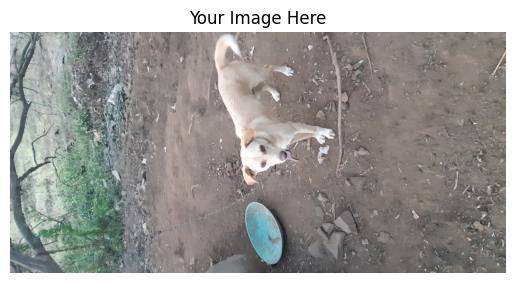

In [31]:





# Load and preprocess the image
image_path="/kaggle/input/cat-dogs/20200318_184923.jpg"

img = preprocess_image(image_path)  # replace with your file path
animal_image= mpimg.imread(image_path)
# Predict
prediction = model_v3.predict(img)

# Interpret prediction
if prediction[0][0] > 0.5:
    print("Predicted: Dog")
    
else:
    print("Predicted: Cat")
   
    

     